# GeoPandas Tutorial

## Install GeoPandas

GeoPandas can be installed using pip or conda. In a Jupyter Notebook, you can run:
* !pip install geopandas

If you're using Anaconda:
* !conda install -c conda-forge geopandas

In [8]:
# !pip install geopandas

## Verify Installation

To verify the installation, import GeoPandas:


In [10]:
import geopandas as gpd
print(gpd.__version__)


1.0.1


## Basic Concepts of GeoPandas

GeoPandas introduces two main data structures:
* GeoSeries: A Series object that contains geometries.
* GeoDataFrame: A DataFrame object with a special column for geometry.

## Getting Started with GeoPandas

In [26]:
# Import Necessary Libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Geospatial Data
# You can load geospatial data files (e.g., shapefiles, GeoJSON) into a GeoDataFrame.

world = gpd.read_file('ne_110m_admin_0_countries.zip')

## Exploring GeoDataFrame

In [29]:
# View the First Few Rows
world.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [31]:
# Summary of the Data
world.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


In [33]:
# Geometries in the Dataset: The geometry column contains the geometric shapes of the data:
world.geometry.head()

0    MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...
1    POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3    MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...
4    MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...
Name: geometry, dtype: geometry

## Basic Geospatial Operations

In [52]:
# Filtering Data

us = world.query("SOVEREIGNT == 'United States of America' and TYPE == 'Country'")
us.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [58]:
# Spatial Operations

# Bounding Box: The smallest rectangle enclosing all geometries.
bbox = us.total_bounds
print(bbox)


[-171.7911106    18.91619     -66.96466      71.35776358]


## Visualization


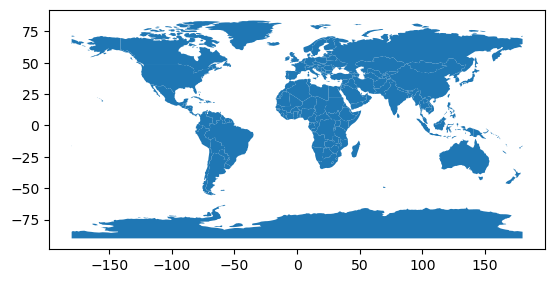

In [61]:
# Plotting Basic Maps
world.plot()
plt.show()

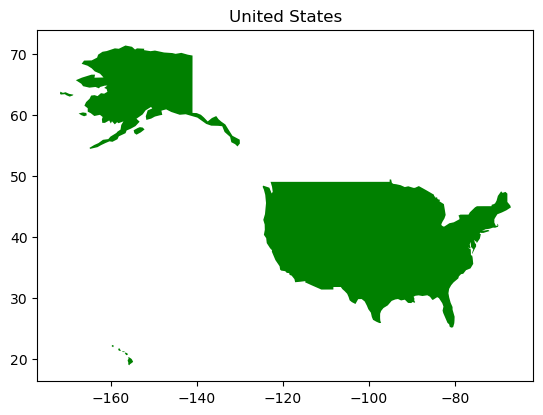

In [65]:
# Highlight a Region
us.plot(color='green')
plt.title('United States')
plt.show()

## Example: Mapping Imaginary Earthquake Data

In [85]:
from shapely.geometry import Point

# Create a GeoDataFrame with earthquake data
data = {
    'magnitude': [4.5, 5.2, 3.8],
    'location': ['Seattle, WA', 'Los Angeles, CA', 'Corvallis, OR'],
    'geometry': [Point(-122.3321, 47.6062), Point(-118.2437, 34.0522), Point(-123.2620, 44.5646)]
}
earthquakes = gpd.GeoDataFrame(data, crs="EPSG:4326")


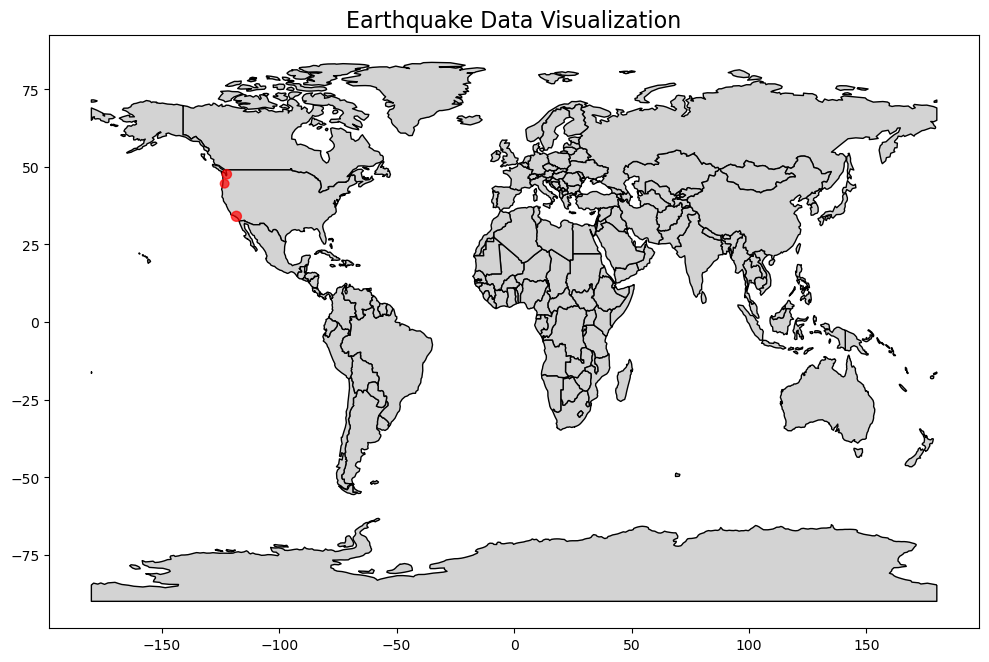

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the markers with size based on magnitude
earthquakes.plot(
    ax=ax,
    color='red',
    markersize=earthquakes['magnitude'] * 10,  # Scale marker size by magnitude
    alpha=0.7
)

# Add title
plt.title("Earthquake Data Visualization", fontsize=16)
plt.show()


## Geopandas + NetworkX

In [93]:
import networkx as nx
from shapely.geometry import Point, LineString

### Create Node and Edge Data
Define nodes as points and edges as lines between nodes:

In [95]:
# Define node locations (latitude, longitude)
nodes = {
    "A": Point(-122.3321, 47.6062),  # Seattle, WA
    "B": Point(-118.2437, 34.0522),  # Los Angeles, CA
    "C": Point(-123.2620, 44.5646)   # Corvallis, OR
}

# Define edges as connections between nodes
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "C")
]

# Create GeoDataFrames for nodes and edges
nodes_gdf = gpd.GeoDataFrame(
    {"name": list(nodes.keys()), "geometry": list(nodes.values())},
    crs="EPSG:4326"
)

edges_gdf = gpd.GeoDataFrame(
    {
        "source": [e[0] for e in edges],
        "target": [e[1] for e in edges],
        "geometry": [
            LineString([nodes[e[0]], nodes[e[1]]]) for e in edges
        ]
    },
    crs="EPSG:4326"
)


### Create a Network with NetworkX
Build a NetworkX graph for analysis and visualization:

In [97]:
# Initialize a NetworkX graph
G = nx.Graph()

# Add nodes
for node, point in nodes.items():
    G.add_node(node, pos=(point.x, point.y))

# Add edges
G.add_edges_from(edges)


### Overlay the Network on the Map
Visualize the network on top of the GeoPandas map

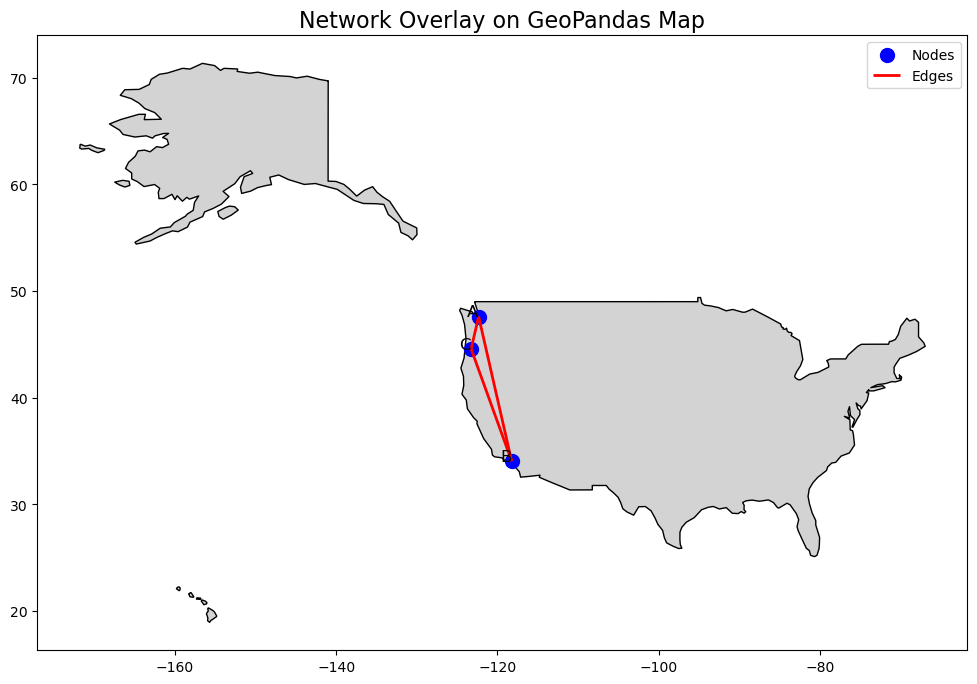

In [103]:
# Plot the base map
fig, ax = plt.subplots(figsize=(12, 8))
us.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the nodes
nodes_gdf.plot(ax=ax, color='blue', markersize=100, label="Nodes")

# Plot the edges
edges_gdf.plot(ax=ax, color='red', linewidth=2, label="Edges")

# Add labels for nodes
for node, (x, y) in nx.get_node_attributes(G, 'pos').items():
    ax.text(x, y, node, fontsize=12, ha='right')

# Add title and legend
plt.title("Network Overlay on GeoPandas Map", fontsize=16)
plt.legend()
plt.show()


### Shortest Path Analysis with NetworkX
You can perform network analysis like shortest paths, centrality, or clustering on the graph.

**Example: Calculate and Display Shortest Path**

Shortest Path: ['A', 'B']


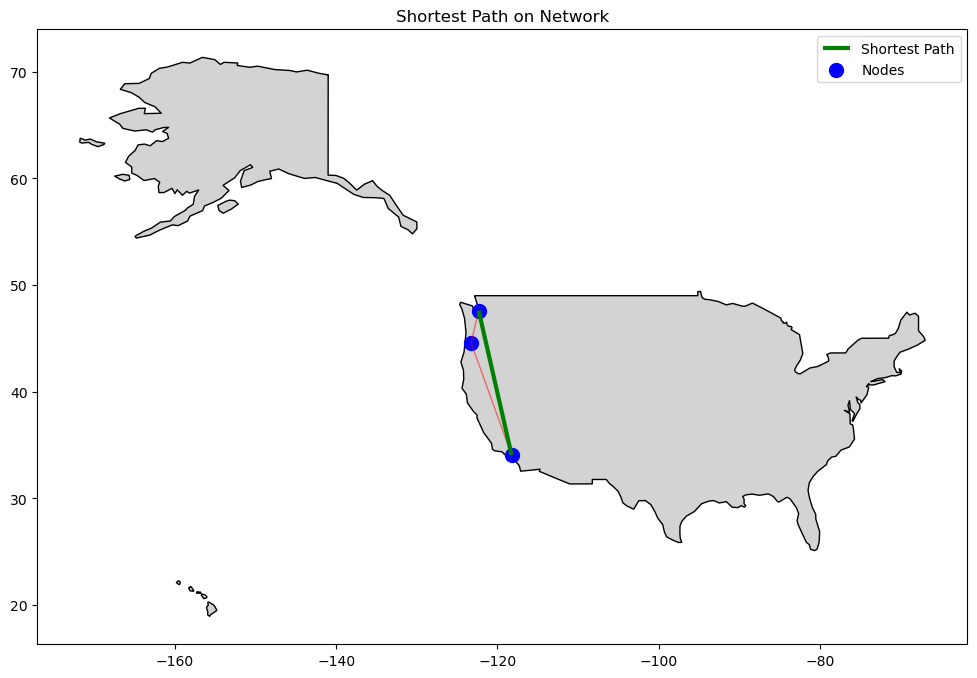

In [105]:
# Compute shortest path between two nodes
shortest_path = nx.shortest_path(G, source="A", target="B")
print("Shortest Path:", shortest_path)

# Highlight the shortest path
shortest_path_edges = [
    (shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path) - 1)
]

# Highlight edges on the map
highlighted_edges = edges_gdf[edges_gdf.apply(
    lambda row: (row['source'], row['target']) in shortest_path_edges or
                (row['target'], row['source']) in shortest_path_edges,
    axis=1
)]

fig, ax = plt.subplots(figsize=(12, 8))
us.plot(ax=ax, color='lightgrey', edgecolor='black')
edges_gdf.plot(ax=ax, color='red', linewidth=1, alpha=0.5)
highlighted_edges.plot(ax=ax, color='green', linewidth=3, label="Shortest Path")
nodes_gdf.plot(ax=ax, color='blue', markersize=100, label="Nodes")

plt.legend()
plt.title("Shortest Path on Network")
plt.show()


## Combining a Heatmap with a GeoPandas Map

The following code demonstrates how to overlay a heatmap on a GeoPandas map. Heatmaps are useful for visualizing the density or intensity of spatial data, such as population density, crime rates, or traffic patterns.

**We will use:**

* GeoPandas: For handling geospatial data.
* Matplotlib: For visualization.
* Seaborn: For creating the heatmap

In [117]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point


### Create Point Data for Heatmap
Generate or load point data with latitude, longitude, and a value column.

**Example: Simulated Data**

In [120]:
data = {
    "latitude": [47.6062, 34.0522, 44.5646, 40.7128, 51.5074],
    "longitude": [-122.3321, -118.2437, -123.2620, -74.0060, -0.1278],
    "value": [5, 7, 3, 10, 8]  # Intensity values
}
points_df = pd.DataFrame(data)

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(points_df["longitude"], points_df["latitude"])]
points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs="EPSG:4326")


### Combine Heatmap with GeoPandas Map
Using Matplotlib and Seaborn,  we can create a kernel density estimation (KDE) heatmap overlay

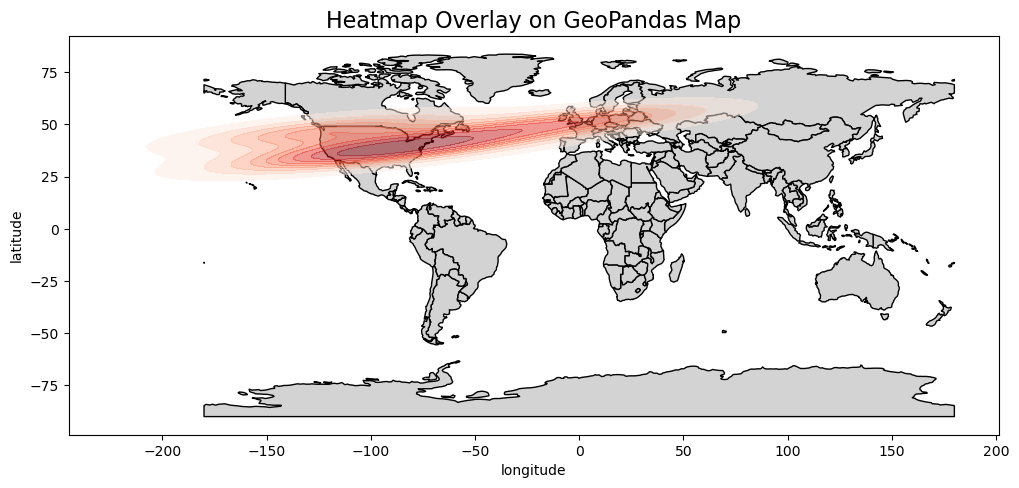

In [123]:
# Extract latitude and longitude for the heatmap
x = points_df["longitude"]
y = points_df["latitude"]
weights = points_df["value"]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the GeoPandas base map
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot heatmap using seaborn
sns.kdeplot(
    x=x,
    y=y,
    weights=weights,
    cmap="Reds",
    fill=True,
    alpha=0.5,
    ax=ax
)

# Add titles and labels
plt.title("Heatmap Overlay on GeoPandas Map", fontsize=16)
plt.show()
